### `01: Exploring dollar bills`
You will practice building classification models in Keras with the Banknote Authentication dataset.

Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: variance,skewness,kurtosis and entropy. These features are calculated by applying mathematical operations over the dollar bill images. The labels are found in the dataframe's class column.

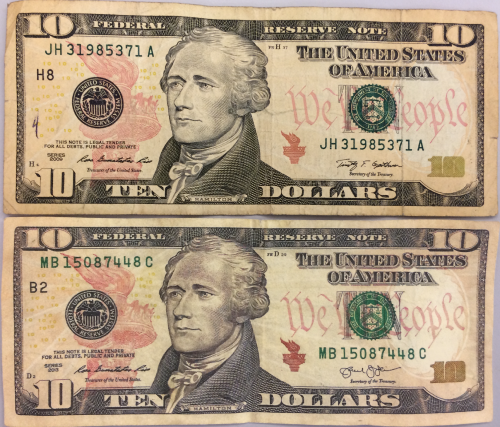

A pandas DataFrame named `banknotes` is ready to use, let's do some data exploration!

- Import `seaborn` as `sns`.
- Use `seaborn's` `pairplot()` on `banknotes` and set `hue` to be the name of the column containing the labels.
- Generate descriptive statistics for the banknotes authentication data.
- Count the number of observations per label with `.value_counts()`.


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
banknotes = pd.read_csv("datasets/banknotes_partitioned.csv")
banknotes

,variance,skewness,curtosis,entropy,class
0,-1.402,-0.005,-0.2810,-0.595,fake
1,0.309,0.447,0.2080,0.675,real
2,-1.566,-1.744,2.5700,-0.117,fake
3,-1.954,0.806,-0.3360,-2.537,fake
4,1.124,-0.189,0.0534,0.937,real
...,...,...,...,...,...
91,0.115,0.664,-0.0468,0.260,real
92,-1.147,-1.869,1.7800,0.100,fake
93,0.689,0.449,-1.4800,-0.813,fake
94,-0.451,0.206,-1.0200,-0.832,fake


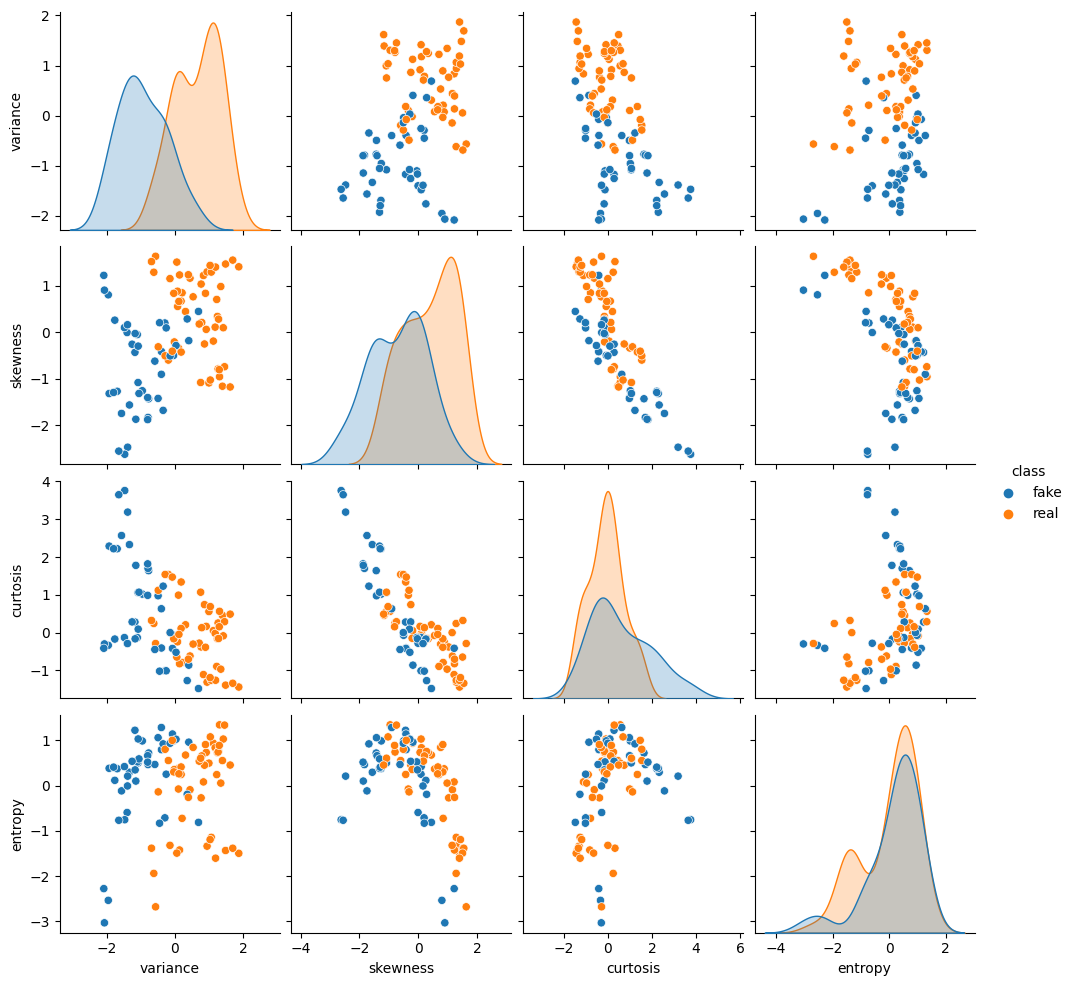

Dataset stats: 
         variance   skewness   curtosis    entropy
count  96.000000  96.000000  96.000000  96.000000
mean   -0.057802  -0.102833   0.230229   0.081521
std     1.044915   1.059284   1.129216   0.975570
min    -2.085000  -2.622000  -1.480000  -3.034000
25%    -0.839250  -0.916000  -0.415000  -0.262750
50%    -0.027000  -0.037500  -0.033600   0.395000
75%     0.871250   0.814000   0.978750   0.745250
max     1.869000   1.634000   3.760000   1.343000
Observations per class: 
 class
real    53
fake    43
Name: count, dtype: int64


In [2]:
# Import seaborn
import seaborn as sns

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

### `02: A binary classification model`
Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model's output will be a value constrained between 0 and 1.

We will interpret this output number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's a fake bill.

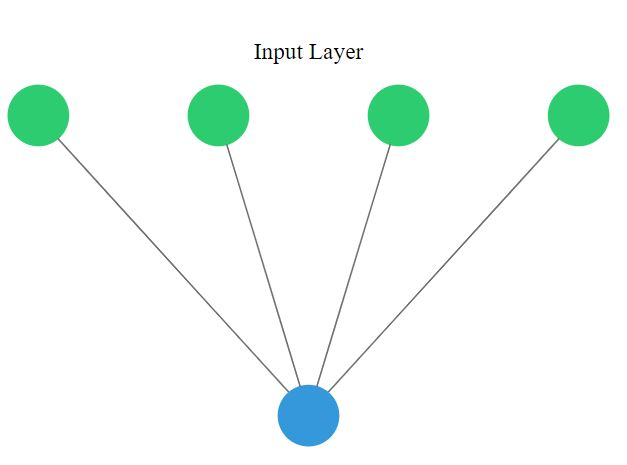

- Import the `Sequential` model and `Dense` layer from tensorflow.keras.
- Create a sequential model.
- Add a 4 neuron input layer with the `input_shape` parameter and a 1 neuron output layer with `sigmoid` activation.
- Compile your model using `sgd` as an optimizer.

In [3]:
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


That was fast! Let's use this classification model to detect fake dollar bills!



### `03: Is this dollar bill fake ?`
You are now ready to train your model and check how well it performs when classifying new bills! The dataset has already been partitioned into features: `X_train` & `X_test`, and labels: `y_train` & `y_test`.

- Train your model for 20 epochs calling `.fit()`, passing in the training data.
- Check your model accuracy using the `.evaluate()` method on the test data.
- Print `accuracy`.

In [4]:
import numpy as np
X_train = np.load("datasets/X_train.npy")
X_test = np.load("datasets/X_test.npy")
y_train = np.load("datasets/y_train.npy")
y_test = np.load("datasets/y_test.npy")

In [5]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/20
30/30 [==============================] - 1s 2ms/step - loss: 0.5619 - accuracy: 0.7375
Epoch 2/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5477 - accuracy: 0.7427
Epoch 3/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5344 - accuracy: 0.7552
Epoch 4/20
30/30 [==============================] - 0s 1ms/step - loss: 0.5220 - accuracy: 0.7656
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 0.5102 - accuracy: 0.7688
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4992 - accuracy: 0.7771
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7885
Epoch 8/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7917
Epoch 9/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7979
Epoch 10/20
30/30 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8031
Epoch 11/20
30/30 [

Alright! It looks like you are getting a high accuracy even with this simple model!



### `04: A multi-class model`
You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's x and y coordinates on the board.)

This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

The Sequential model and Dense layers are already imported for you to use.

Instantiate a Sequential model.
Add 3 dense layers of 128, 64 and 32 neurons each.
Add a final dense layer with as many neurons as competitors.
Compile your model using categorical_crossentropy loss.

In [6]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

Good job! Your models are increasing in depth, just as your knowledge on neural networks!



### `05: Prepare your dataset`
In the console you can check that your labels, darts.competitor are not yet in a format to be understood by your network. They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation.

This is useful for multi-class classification problems, since there are as many output neurons as classes and for every observation in our dataset we just want one of the neurons to be activated.

The dart's dataset is loaded as darts. Pandas is imported as pd. Let's prepare this dataset!

- Use the `Categorical()` method from pandas to transform the `competitor` column.
- Assign a number to each competitor using the `cat.codes` attribute from the competitor column

In [7]:
darts = pd.read_csv("datasets/darts.csv")
darts

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve
...,...,...,...
795,0.320435,-0.327131,Kate
796,-0.179372,0.594201,Steve
797,0.530315,-0.833321,Michael
798,-0.287258,0.890928,Michael


In [8]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes

# Print the label encoded competitors
print('Label encoded competitors: \n',darts.competitor.head())

Label encoded competitors: 
 0    2
1    3
2    1
3    0
4    2
Name: competitor, dtype: int8


- Import `to_categorical` from `tensorflow.keras.utils`.
- Apply `to_categorical()` to your labels.

In [9]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


Great! Each competitor is now a vector of length 4, full of zeroes except for the position representing her or himself.

### `06: Training on dart throwers`
Your model is now ready, just as your dataset. It's time to train!

The coordinates features and competitors labels you just transformed have been partitioned into coord_train,coord_test and competitors_train,competitors_test.

Your model is also loaded. Feel free to visualize your training data or model.summary() in the console.

Let's find out who threw which dart just by looking at the board!

- Train your `model` on the training data for 200 `epochs`.
- Evaluate your `model` accuracy on the test data.

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
coord_train, coord_test, competitors_train,competitors_test= train_test_split(coordinates, competitors, test_size=0.2, random_state=42)
competitors_test.shape

(160, 4)

In [11]:
# Fit your model to the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
20/20 [==============================] - 0s 2ms/step - loss: 1.3631 - accuracy: 0.2797
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 1.3000 - accuracy: 0.4516
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 1.2155 - accuracy: 0.4938
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 1.1148 - accuracy: 0.5703
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 1.0129 - accuracy: 0.5688
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.9324 - accuracy: 0.5906
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8722 - accuracy: 0.6344
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8423 - accuracy: 0.6281
Epoch 9/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8253 - accuracy: 0.6734
Epoch 10/200
20/20 [==============================] - 0s 2ms/step - loss: 0.8145 - accuracy: 0.6750
Epoch 11/

### `07: Softmax predictions`
Your recently trained model is loaded for you. This model is generalizing well!, that's why you got a high accuracy on the test set.

Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

Use the collection of test throws stored in coords_small_test and np.argmax()to check this out!

- Predict with your `model` on `coords_small_test`.
- Print the model predictions.

In [12]:
coords_small_test = coordinates.iloc[[337, 295, 243, 91, 375]]
competitors_small_test = competitors[[337, 295, 243, 91, 375]]

In [13]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

1/1 [==============================] - 0s 92ms/step
Raw Model Predictions                         | True labels
[0.277668   0.01605025 0.69863427 0.0076475 ] | [0. 0. 1. 0.]
[0.0894578  0.01008039 0.09290501 0.80755675] | [0. 0. 0. 1.]
[0.32470748 0.02093049 0.26821256 0.3861494 ] | [0. 0. 0. 1.]
[0.9155796  0.0245016  0.05411755 0.00580136] | [1. 0. 0. 0.]
[0.34270293 0.01060381 0.63968533 0.007008  ] | [0. 0. 1. 0.]


- Use `np.argmax()`to extract the index of the highest probable competitor from each pred vector in `preds`.

In [14]:
# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

1/1 [==============================] - 0s 25ms/step
Raw Model Predictions                         | True labels
[0.277668   0.01605025 0.69863427 0.0076475 ] | [0. 0. 1. 0.]
[0.0894578  0.01008039 0.09290501 0.80755675] | [0. 0. 0. 1.]
[0.32470748 0.02093049 0.26821256 0.3861494 ] | [0. 0. 0. 1.]
[0.9155796  0.0245016  0.05411755 0.00580136] | [1. 0. 0. 0.]
[0.34270293 0.01060381 0.63968533 0.007008  ] | [0. 0. 1. 0.]
Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]


Well done! As you've seen you can easily interpret the softmax output. This can also help you spot those observations where your network is less certain on which class to predict, since you can see the probability distribution among classes per prediction. Let's learn how to solve new problems with neural networks!



### `08: An irrigation machine`

You're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.

The Sequential() model and Dense() layers are ready to be used. It's time to build an intelligent irrigation machine!

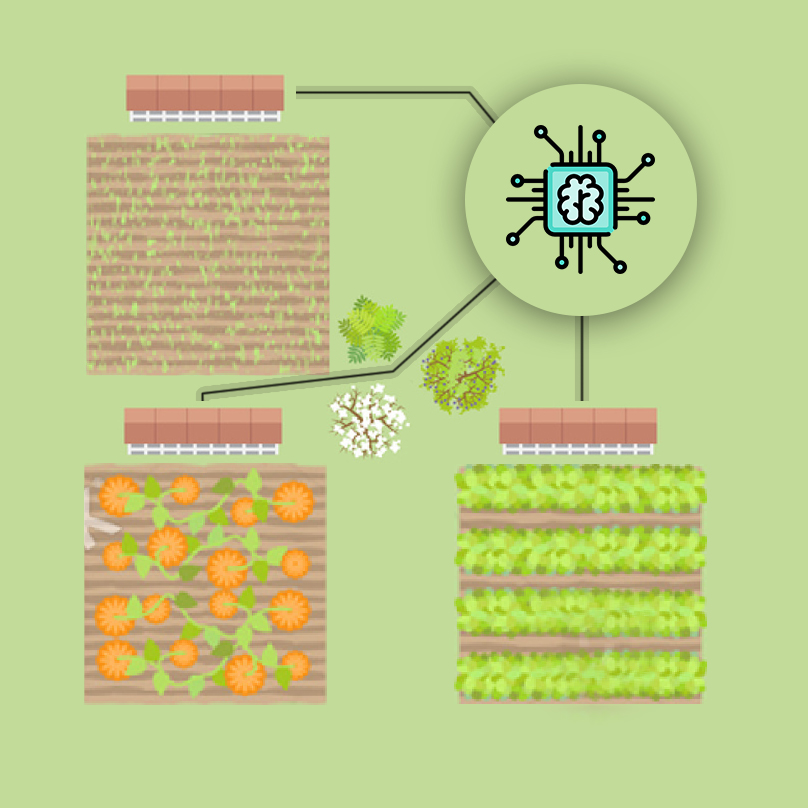

- Instantiate a `Sequential()` model.
- Add a hidden layer of 64 neurons with as many input neurons as there are sensors and `relu` activation.
- Add an output layer with as many neurons as parcels and `sigmoid` activation.
- Compile your model with the `adam` optimizer and `binary_crossentropy` loss.

In [15]:
# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, activation='relu', input_shape=(20,)))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1344      
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


Great! You've already built 3 models for 3 different problems! Hopefully you're starting to get a feel for how different problems can be modeled in the neural network realm.



In [16]:
irrigation_machine = pd.read_csv("datasets/irrigation_machine.csv", index_col=0)
irrigation_machine.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [17]:
from sklearn.model_selection import train_test_split

sensors = irrigation_machine.iloc[:,:20]
parcels = irrigation_machine.iloc[:,-3:]

# Split the data into training and test sets
sensors_train, sensors_test, parcels_train,parcels_test= train_test_split(sensors, parcels, test_size=0.3, random_state=42)

In [18]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/100
35/35 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.5000 - val_loss: 0.5265 - val_accuracy: 0.4500
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.6089 - val_loss: 0.4318 - val_accuracy: 0.5714
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.6187 - val_loss: 0.3793 - val_accuracy: 0.6036
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.6438 - val_loss: 0.3431 - val_accuracy: 0.6143
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3369 - accuracy: 0.6464 - val_loss: 0.3248 - val_accuracy: 0.6643
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3206 - accuracy: 0.6429 - val_loss: 0.3121 - val_accuracy: 0.6464
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3113 - accuracy: 0.6527 - val_loss: 0.3022 - val_accuracy: 0.6214
Epoch 8/100
3

Great work on automating this farm! You can see how the validation_split argument is useful for evaluating how your model performs as it trains. Let's move on and improve your model training by using callbacks!



### `09: The history callback`

The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary parameter inside the returned h_callback object with the corresponding keys.

The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels now loaded as X_train, y_train, X_test, y_test. This time you will store the model's historycallback and use the validation_data parameter as it trains.

You will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. You can check their code in the console by pasting show_code(plot_loss).

Let's see the behind the scenes of our training!

- Train your model on `X_train` and `y_train`, validate each epoch on `X_test` and `y_test`.
- Use `plot_loss` extracting `loss` and `val_loss` from `h_callback`.
- Use `plot_accuracy` extracting `accuracy` and `val_accuracy` from `h_callback`.



In [19]:
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()


def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [22]:
X_train, X_test, y_train, y_test= train_test_split(sensors, parcels, test_size=0.3, random_state=42)

Epoch 1/25
44/44 [==============================] - 0s 5ms/step - loss: 0.1500 - accuracy: 0.6086 - val_loss: 0.2593 - val_accuracy: 0.6450
Epoch 2/25
44/44 [==============================] - 0s 4ms/step - loss: 0.1479 - accuracy: 0.6007 - val_loss: 0.2600 - val_accuracy: 0.6417
Epoch 3/25
44/44 [==============================] - 0s 4ms/step - loss: 0.1479 - accuracy: 0.6200 - val_loss: 0.2599 - val_accuracy: 0.6133
Epoch 4/25
44/44 [==============================] - 0s 4ms/step - loss: 0.1449 - accuracy: 0.6221 - val_loss: 0.2601 - val_accuracy: 0.6033
Epoch 5/25
44/44 [==============================] - 0s 5ms/step - loss: 0.1440 - accuracy: 0.6143 - val_loss: 0.2650 - val_accuracy: 0.6433
Epoch 6/25
44/44 [==============================] - 0s 4ms/step - loss: 0.1458 - accuracy: 0.5907 - val_loss: 0.2610 - val_accuracy: 0.6367
Epoch 7/25
44/44 [==============================] - 0s 4ms/step - loss: 0.1456 - accuracy: 0.6193 - val_loss: 0.2639 - val_accuracy: 0.5950
Epoch 8/25
44/44 [==

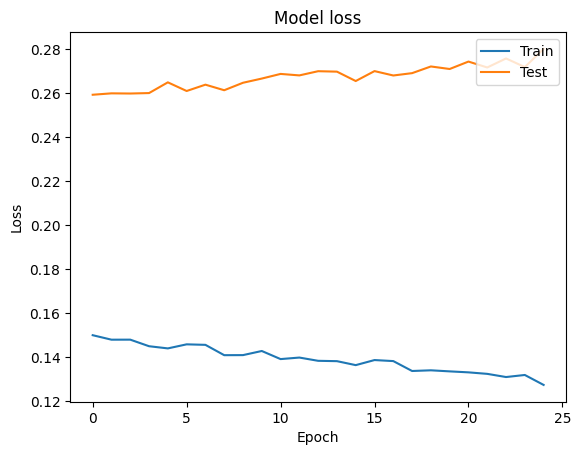

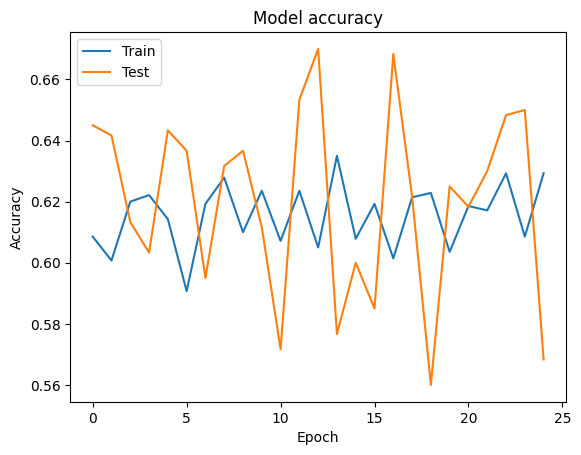

In [23]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

Awesome! These graphs are really useful for detecting overfitting and to know if your neural network would benefit from more training data. More on this in the next chapter!



### `10: Early stopping your model`
The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, X_test and y_test are also available for your use.

- Import the `EarlyStopping` callback from `tensorflow.keras.callbacks`.
- Define a callback, monitor `'val_accuracy'` with a `patience` of 5 epochs.
- Train your model using the early stopping callback.

In [33]:
X_train = np.load("datasets/X_train_week2.npy")
X_test = np.load("datasets/X_test_week2.npy")
y_train = np.load("datasets/y_train_week2.npy")
y_test = np.load("datasets/y_test_week2.npy")

In [34]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(5, input_shape=(4,), activation='relu'))
# Add a dense layer with as many neurons as competitors
model.add(Dense(1))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [35]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test,y_test),
           callbacks= [monitor_val_acc])

Epoch 1/1000
30/30 [==============================] - 0s 7ms/step - loss: 4.7744 - accuracy: 0.5688 - val_loss: 4.9319 - val_accuracy: 0.5607
Epoch 2/1000
30/30 [==============================] - 0s 4ms/step - loss: 4.6508 - accuracy: 0.5833 - val_loss: 4.8803 - val_accuracy: 0.5704
Epoch 3/1000
30/30 [==============================] - 0s 4ms/step - loss: 4.5562 - accuracy: 0.5906 - val_loss: 4.7739 - val_accuracy: 0.5704
Epoch 4/1000
30/30 [==============================] - 0s 4ms/step - loss: 4.4970 - accuracy: 0.5990 - val_loss: 4.7355 - val_accuracy: 0.5728
Epoch 5/1000
30/30 [==============================] - 0s 4ms/step - loss: 4.4589 - accuracy: 0.6021 - val_loss: 4.6459 - val_accuracy: 0.5777
Epoch 6/1000
30/30 [==============================] - 0s 4ms/step - loss: 4.3350 - accuracy: 0.6094 - val_loss: 4.4567 - val_accuracy: 0.5850
Epoch 7/1000
30/30 [==============================] - 0s 4ms/step - loss: 4.2210 - accuracy: 0.6167 - val_loss: 4.3207 - val_accuracy: 0.5850
Epoch 

Great! Now you won't ever fall short of epochs! Your model will stop early if the quantity monitored doesn't improve for the given amount of epochs.



### `11: A combination of callbacks`
Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime and resume training where you left it.

The model training and validation data are available in your workspace as X_train, X_test, y_train, and y_test.

Use the EarlyStopping() and the ModelCheckpoint() callbacks so that you can go eat a jar of cookies while you leave your computer to work!


- Import both the `EarlyStopping` and `ModelCheckpoint` callbacks from `tensorflow.keras`.
- Create `monitor_val_acc` as an `EarlyStopping` callback that will monitor `'val_accuracy'`, with a `patience` of 3 epochs.
- Create `model_checkpoint` as a `ModelCheckpointcallback`, save the best model as `best_banknote_model.hdf5`.
- Fit your model providing a list with the defined callbacks and `X_test` and `y_test` as validation data.

In [36]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('models/best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    validation_data = (X_test, y_test))

Epoch 1/1000000000000
30/30 [==============================] - 0s 17ms/step - loss: 0.1336 - accuracy: 0.9521 - val_loss: 0.1420 - val_accuracy: 0.9490
Epoch 2/1000000000000
30/30 [==============================] - 0s 5ms/step - loss: 0.1317 - accuracy: 0.9521 - val_loss: 0.1397 - val_accuracy: 0.9490
Epoch 3/1000000000000
30/30 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.9542 - val_loss: 0.1376 - val_accuracy: 0.9490
Epoch 4/1000000000000
30/30 [==============================] - 0s 5ms/step - loss: 0.1279 - accuracy: 0.9552 - val_loss: 0.1353 - val_accuracy: 0.9515
Epoch 5/1000000000000
30/30 [==============================] - 0s 4ms/step - loss: 0.1261 - accuracy: 0.9563 - val_loss: 0.1332 - val_accuracy: 0.9515
Epoch 6/1000000000000
30/30 [==============================] - 0s 4ms/step - loss: 0.1243 - accuracy: 0.9583 - val_loss: 0.1308 - val_accuracy: 0.9539
Epoch 7/1000000000000
30/30 [==============================] - 0s 4ms/step - loss: 0.1225 - a

You've learned a powerful callback combo! Nice moves! Now you always save the model that performed best, even if you early stopped at one that was already performing worse.

